# Your info

Full name: Niki Nezakati

Student ID: 98522094

# Q2. MLP

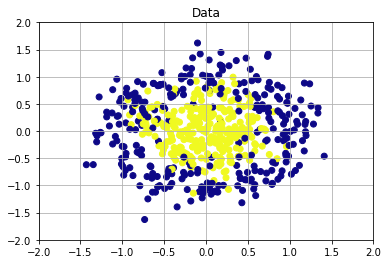

In [11]:
# Q2_graded
# Do not change the above line.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(0)
# Dataset
X,Y = datasets.make_circles(n_samples=576, shuffle=True, noise=0.25, random_state=None, factor=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Data')
plt.show()

Building the L-layered Neural Network

In [12]:
# Q2_graded
# Do not change the above line.

# Type your code here

def sigmoid(Z):
    """
    Z --> array of any shape
    
    Returns:
    A --> output of sigmoid(z), same shape as Z
    cache --> returns Z used for backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Z --> Output of the linear layer, of any shape

    Returns:
    A --> Post-activation parameter, of the same shape as Z
    cache --> a  dictionary containing "A" ; used for backward pass 
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    backward propagation for a single RELU unit.
    
    dA --> post-activation gradient, of any shape
    cache --> 'Z' where we stored for computing backward propagation 

    Returns:
    dZ --> Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    backward propagation for a single SIGMOID unit.
    
    dA ->- post-activation gradient, of any shape
    cache --> 'Z' where we stored for computing backward propagation 

    Returns:
    dZ --> Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

 

def initialize_parameters_deep(layer_dims):
    """
    
    layer_dims --> array containing the dimensions of each layer 
    
    Returns:
    parameters :
                Wl --> weight matrix of shape (layer_dims[l], layer_dims[l-1])
                bl --> bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)    # L = number of layers

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * .01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters    

def linear_forward(A, W, b):
    """

    A --> activations from previous layer : (size of previous layer, number of examples)
    W --> weights matrix : (size of current layer, size of previous layer)
    b --> bias vector : (size of the current layer, 1)

    Returns:
    Z --> the input of the activation function 
    cache --> a tuple containing "A", "W" and "b" ; used for backward pass 
    """
    
    Z = np.dot(W, A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


def linear_activation_forward(A_prev, W, b, activation):
    """
    forward propagation for the LINEAR->ACTIVATION layer

  
    A_prev --> activations from previous layer : (size of previous layer, number of examples)
    W --> weights matrix: (size of current layer, size of previous layer)
    b --> bias vector: (size of the current layer, 1)
    activation --> the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A --> the output of the activation function
    cache --> a tuple containing "linear_cache" and "activation_cache"; used for backward pass
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
     
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))

    cache = (linear_cache, activation_cache)

    return A, cache   

def L_model_forward(X, parameters):
    """
    Forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    X --> data : (input size, number of examples)
    parameters --> output of initialize_parameters_deep()
    
    Returns:
    AL --> last post-activation value
    caches --> list of caches containing:
                every cache of linear_activation_forward() (L-1 caches , indexed from 0 to L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2    # number of layers 
    
    #[LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
        
    
    #LINEAR -> SIGMOID. (output layer)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
   
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches     

def compute_cost(AL, y):
    
    m = y.shape[0]
    loss = 1/2 * (AL - y)**2
    cost = (1 / m) * np.sum(loss)
    return loss, cost

def computeAccuracy(AL, y):
      return 100 - np.mean(np.abs(AL - y)) * 100


def linear_backward(dZ, cache):
    """
    Linear portion of backward propagation for a single layer (layer l)

    dZ --> Gradient of the cost with respect to the linear output (of current layer l)
    cache --> tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev --> Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW --> Gradient of the cost with respect to W (current layer l), same shape as W
    db --> Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
  
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Backward propagation for the LINEAR->ACTIVATION layer.
  
    dA --> post-activation gradient for current layer l 
    cache --> tuple of values (linear_cache, activation_cache) we store for computing backward propagation 
    activation --> the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev --> Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW --> Gradient of the cost with respect to W (current layer l), same shape as W
    db --> Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db 

def L_model_backward(AL, Y, caches):
    """
    Backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
 
    AL --> output of the forward propagation (L_model_forward())
    Y --> true "label" vector (0 if blue, 1 if yellow)
    caches -- list of caches containing:
                caches of linear_activation_forward() with "relu" (caches[l], for l in range(L-1))
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads --> A dictionary with the gradients
             grads["dA" + str(l)] 
             grads["dW" + str(l)] 
             grads["db" + str(l)] 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1] # number of dots
    Y = Y.reshape(AL.shape) 
    
    
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = \
    linear_activation_backward(dAL, current_cache, "sigmoid")

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
      
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
       

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
  
    parameters -->  dictionary containing parameters 
    grads -->  dictionary containing  gradients, output of L_model_backward

    Returns:
    parameters --> dictionary containing your updated parameters 
                  parameters["W" + str(l)] 
                  parameters["b" + str(l)] 
    """
    
    L = len(parameters) // 2 # number of layers 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    
    return parameters    

Exploring the Dataset 

In [13]:
# Q2_graded
# Do not change the above line.

# Type your code here
m_train = X.shape[0]
num_px = X.shape[1]

print ("Number of training examples: " + str(m_train))
print ("Each dot's number of Coordinates: " + str(num_px))

x_train = X 
x_train = x_train.T

print ("x_train's shape: " + str(x_train.shape))


Number of training examples: 576
Each dot's number of Coordinates: 2
x_train's shape: (2, 576)


Training the Neural Network

In [14]:
# Q2_graded
# Do not change the above line.

# Type your code here



def perceptron_model(X, Y, layers_dims, learning_rate , Epoch , print_cost=True):
    
    np.random.seed(1)
    costs = []   
    losses = [] 
    accuracies = []                          
                          
  
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, Epoch):

        AL, caches = L_model_forward(X, parameters)
        loss,cost = compute_cost(AL, Y)
        losses.append(loss)
        costs.append(cost)
        accuracy = computeAccuracy(AL, Y)
        accuracies.append(accuracy)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
                print('Epoch:', i, '  cost:', cost, ' accuracy%:', accuracy)

        
       
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Epoch (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    plt.plot(np.squeeze(losses))
    plt.ylabel('Loss')
    plt.xlabel('Epoch (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    plt.plot(np.squeeze(accuracies))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters
    

Running the Model

Epoch: 0   cost: 0.12499855119035741  accuracy%: 50.000289778631846
Epoch: 100   cost: 0.12479670303595523  accuracy%: 50.04076676362385
Epoch: 200   cost: 0.11505297534587769  accuracy%: 52.23258728519568
Epoch: 300   cost: 0.0927542995271179  accuracy%: 60.61956416287815
Epoch: 400   cost: 0.0635582180982747  accuracy%: 68.6431580578556
Epoch: 500   cost: 0.05037563726635812  accuracy%: 75.90322065119159
Epoch: 600   cost: 0.04715044011741253  accuracy%: 78.32389463477091
Epoch: 700   cost: 0.04576548940989663  accuracy%: 79.50512655354824
Epoch: 800   cost: 0.04519873295482288  accuracy%: 80.23466591016606
Epoch: 900   cost: 0.04487980796655761  accuracy%: 80.70661465499859
Epoch: 1000   cost: 0.044695594636539875  accuracy%: 81.0333700095874
Epoch: 1100   cost: 0.04457423630044516  accuracy%: 81.26065097511338
Epoch: 1200   cost: 0.044444264375766866  accuracy%: 81.38550520409538
Epoch: 1300   cost: 0.04438091699131209  accuracy%: 81.53971699546818
Epoch: 1400   cost: 0.04434432322

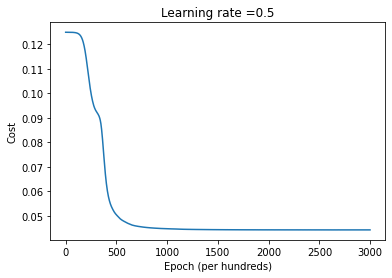

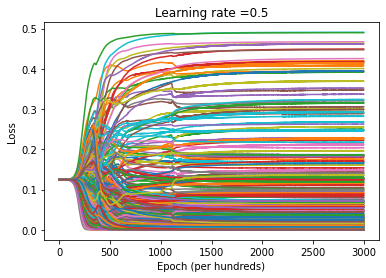

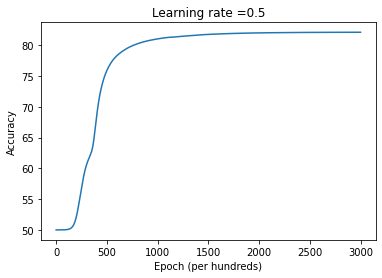

In [15]:
# Q2_graded
# Do not change the above line.

# Type your code here
n_x = num_px     
n_y = 1

layers_dims = [n_x, 3, n_y]

learning_rate = 0.5
Epoch = 3000

parameters = perceptron_model(x_train, Y, layers_dims, learning_rate , Epoch , print_cost=True)



In [16]:
# Q2_graded
# Do not change the above line.

# Type your code here

def predict(parameters, x_train):
    
    AL, caches = L_model_forward(x_train, parameters)
    predictions = AL > .5
    
    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)    

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 1')

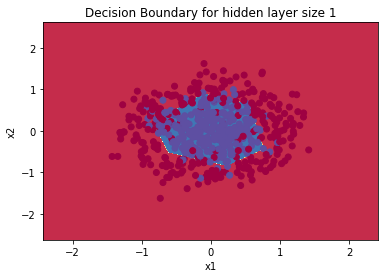

In [17]:
# Q2_graded
# Do not change the above line.

# Type your code here

plot_decision_boundary(lambda x: predict(parameters, x.T), x_train, Y)
plt.title("Decision Boundary for hidden layer size " + str(len(layers_dims)-2))

# Q3. Keras


In [18]:
# Q3_graded
# Do not change the above line.

# Type your code here

from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Model
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import regularizers

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
800/800 [==============================] - 15s 17ms/step - loss: 1.9702 - accuracy: 0.3359 - val_loss: 1.6397 - val_accuracy: 0.4714
Epoch 2/30
800/800 [==============================] - 12s 16ms/step - loss: 1.4707 - accuracy: 0.5390 - val_loss: 1.3402 - val_accuracy: 0.5947
Epoch 3/30
800/800 [==============================] - 12s 15ms/step - loss: 1.2668 - accuracy: 0.6178 - val_loss: 1.2640 - val_accuracy: 0.6282
Epoch 4/30
800/800 [==============================] - 13s 16ms/step - loss: 1.1367 - accuracy: 0.6665 - val_loss: 1.1424 - val_accuracy: 0.6742
Epoch 5/30
800/800 [==============================] - 13s 16ms/step - loss: 1.0330 - accuracy: 0.7059 - val_loss: 1.1351 - val_accuracy: 0.6757
Epoch 6/30
800/800 [==============================] - 13s 16ms/step - loss: 0.9516 - accuracy: 0.7368 - val_loss: 1.0869 - val_accuracy: 0.7009
Epoch 7/30
800/800 [==============================] - 12s 15ms/step - loss: 0.8761 - accuracy: 0.7642 - val_loss: 1.0960 - val_accuracy:

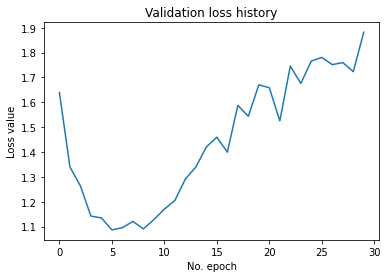

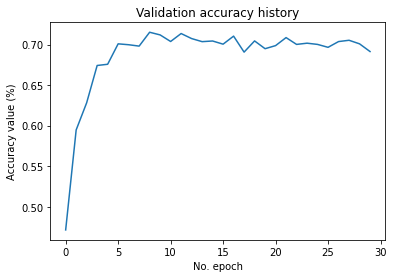

In [19]:
# Q3_graded
# Do not change the above line.

# Type your code here

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = tf.keras.losses.sparse_categorical_crossentropy
no_classes = 10
no_epochs = 30
optimizer = tf.keras.optimizers.SGD(lr = 0.01, momentum=0.9 ,nesterov=True)
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5) ,input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))

model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Q5. Extra


In [20]:
# Q5_graded
# Do not change the above line.

# Type your code here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW1` section and your final report for all of the questions as a **single pdf** file in `HW1 - Report`. Autograder will automatically check for:
    - `CI002_HW1.ipynb`
    - `Q2.py`
    - `Q3.py`
    - `Q5.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.